# Data analysis can be split into three elementary steps:
## 1. Importing the data
All the methods necessary to **read** the file contents, parse data and output it in desired format. Ie. something like that:
 
```
import pathlib
import pandas as pd

def data_import(self, path: pathlib.Path) -> pd.DataFrame:
    # ... 
    # dataframe =
    return dataframe
```

## 2. Processing the data
All the smoothing, normalization, interpolation, etc. should happen here. Implemented using composite design pattern.

## 3. Showing the data
ble ble

# Implementation using bridge design pattern/dependency injection:


In [102]:
import pathlib
from pathlib import Path
from IPython.display import display
from abc import ABC, abstractmethod
from typing import Callable, Optional, List
import pandas as pd
from pandas.errors import ParserError
import numpy as np
import itertools

class Handler(ABC):
    @abstractmethod
    def handle(self, *args, **kwargs):
        raise NotImplementedError("You should implement this!")
        
    def update_handler(self, new_handler: Callable) -> None:
        self.handle = new_handler
        
class FileHandler(Handler):
    def handle(self, path: pathlib.Path) -> pd.DataFrame:
        with open(path) as f:
            for i, row in enumerate(f):
                for delimiter, decimal in (itertools.product([';',',','\t'], ['.',','])):
                    try:
                        df = pd.read_csv(path ,delimiter=delimiter, decimal=decimal, index_col=0, skiprows=i,header=None, on_bad_lines='skip', dtype=np.float64)
                        

                        return df
                        # return df[df.columns[-1]]

                    except Exception:
                        pass
    
class DataHandler(Handler):
    def __init__(self, handler: Optional[Callable]=None):
        super().__init__()
        
        if handler is not None:
            self.update_handler(handler)
        
    def handle(self,  data: pd.DataFrame) -> pd.DataFrame:
        return data

class Pipeline(DataHandler):
    def __init__(self) -> None:
        self.operations: List[DataHandler] = []
        
    def handle(self,  data: pd.DataFrame) -> pd.DataFrame:
        for o in self.operations:
            data = o.handle( data )
        return data

    def add(self, *operations: DataHandler) -> None:
        for o in operations:
            self.operations.append(o)

    def remove(self,*operations: DataHandler) -> None:
        for o in operations:
            self.operations.remove(o)
            
class DataModel(ABC):
    def __init__(self, path: pathlib.Path, reader: Optional[FileHandler]=FileHandler()) -> None:
        self._reader=reader
        self._pipeline=Pipeline()
        self.path=path
    @property
    def path(self):
        return self._path
    
    @path.setter
    def path(self, path: pathlib.Path):
        self._path = path
    @property
    def raw_data(self):
        return self._reader.handle(self.path)
    @property
    def data(self):
        return self._pipeline.handle(self.raw_data)
 
absorbance_data = Path('../patka-pomiary/CPE45_PFOBPy_comocat.txt')
fluorescence_data = Path('../patka-pomiary/func39.txt')



get_last_column_only = DataHandler(lambda df: df[df.columns[-1]])
normalize = DataHandler(lambda df: df.truediv(df.where(np.logical_and(df.index>800, df.index<1000)).min()))

dm = DataModel(path=absorbance_data)

dm2 = DataModel(path=fluorescence_data)

# display(dm.data)
# display(dm2.data)

dm._pipeline.add(get_last_column_only)
dm._pipeline.add(normalize)
dm.data

0
1100.0    1.085271
1099.0    1.085271
1098.0    1.082687
1097.0    1.080103
1096.0    1.077519
            ...   
404.0     2.552972
403.0     2.687339
402.0     2.821705
401.0     2.961240
400.0     3.064599
Name: 1, Length: 701, dtype: float64

__main__.DataHandler

<AxesSubplot:xlabel='0'>

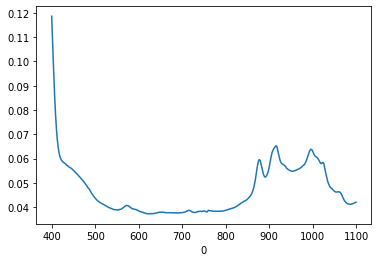